In [8]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load dataset
file_path = 'Online Retail Dataset.csv' 
df = pd.read_csv(file_path)

In [ ]:
# Tampilkan beberapa baris pertama dataset
print("Dataset preview:")
print(df.head())

Dataset preview:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [11]:
# Info dataset untuk memahami tipe data dan missing values
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [12]:
# Statistik deskriptif awal
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [13]:
# Mengecek nilai yang hilang
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [14]:
# Preprocessing
# 1. Hapus baris dengan nilai yang hilang
df_cleaned = df.dropna()

# 2. Hapus transaksi negatif (jika ada kolom seperti 'Quantity' atau 'UnitPrice')
if 'Quantity' in df_cleaned.columns:
    df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]

if 'UnitPrice' in df_cleaned.columns:
    df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]


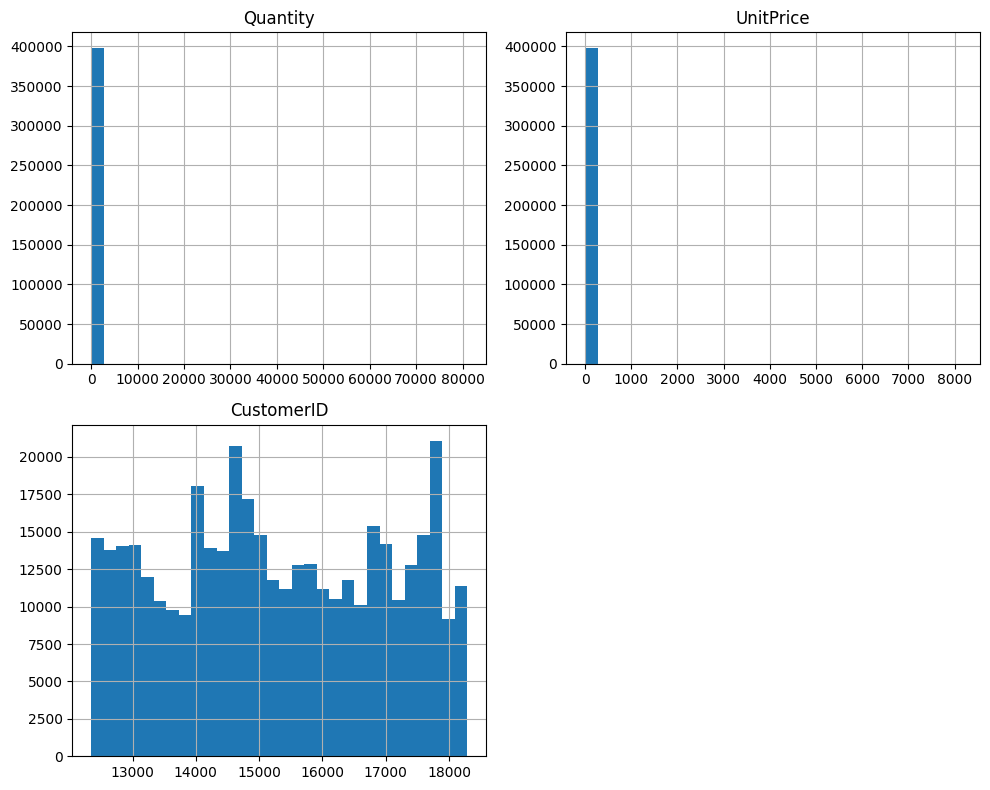

In [15]:
# Eksplorasi Data
# 1. Visualisasi distribusi kolom numerik
numeric_columns = df_cleaned.select_dtypes(include='number').columns
df_cleaned[numeric_columns].hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()


Top 5 countries with the most transactions:
Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: count, dtype: int64


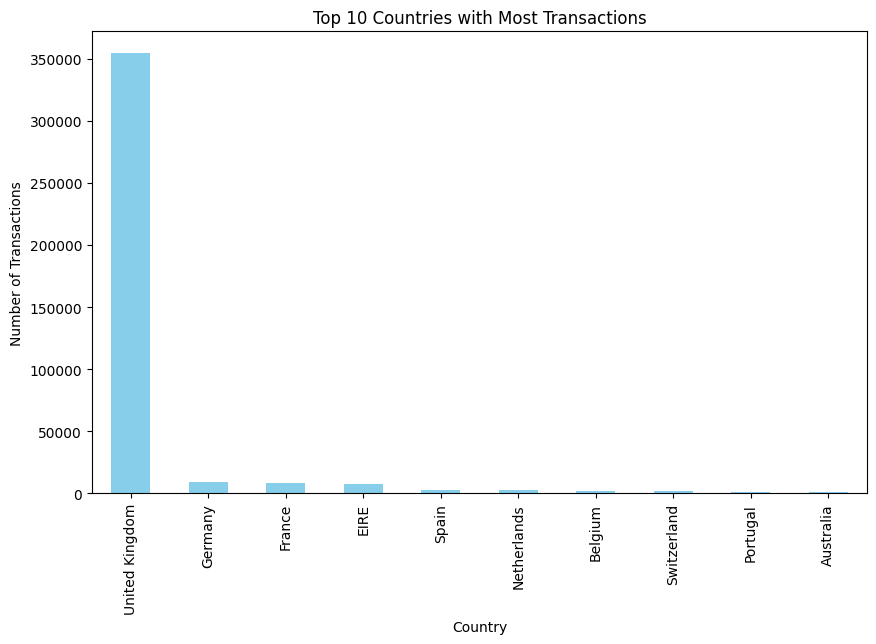

In [16]:
# 2. Analisis kolom kategorikal
if 'Country' in df_cleaned.columns:
    print("\nTop 5 countries with the most transactions:")
    print(df_cleaned['Country'].value_counts().head(5))

      # Visualisasi negara dengan transaksi terbanyak
    plt.figure(figsize=(10, 6))
    df_cleaned['Country'].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title('Top 10 Countries with Most Transactions')
    plt.xlabel('Country')
    plt.ylabel('Number of Transactions')
    plt.show()

In [17]:
# Simpan data yang sudah diproses ke file baru
output_file = 'Cleaned_Online_Retail.csv'
df_cleaned.to_csv(output_file, index=False)
print(f"\nData yang sudah diproses disimpan ke: {output_file}")


Data yang sudah diproses disimpan ke: Cleaned_Online_Retail.csv
